In [180]:
from lcapy import L,C,R

In [181]:
cir = L('L') | (C('C')+L('L_p')) | R('R')

In [182]:
cir.Z.free_symbols

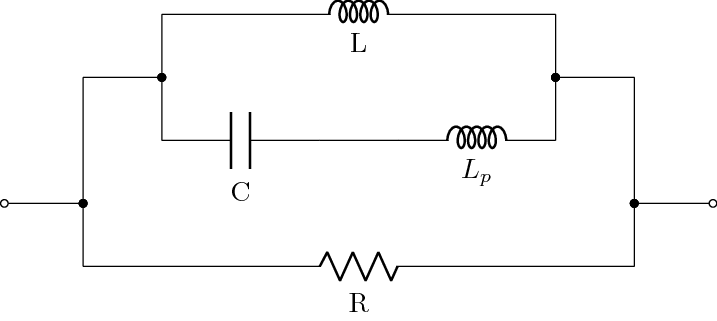

In [4]:
cir.draw()

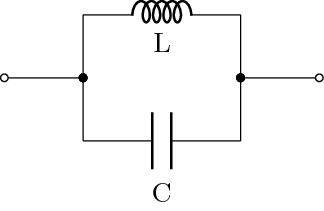

In [120]:
cir = L('L') | C('C') 
cir.draw()

In [153]:
cir.Y

  ⎛ 2    1 ⎞
C⋅⎜s  + ───⎟
  ⎝     C⋅L⎠
────────────
     s      

In [122]:
type(cir.Z)

lcapy.core.Zs

In [123]:
type(cir.Z.expr)

sympy.core.mul.Mul

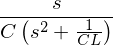

In [124]:
cir.Z.expr

In [125]:
all_circuit_elements = cir.Z.free_symbols
all_circuit_elements

2


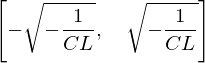

In [126]:
from sympy import solve
from sympy import Symbol
ws = solve(cir.Y,Symbol('s'))
print len(ws)
ws

In [127]:
{x:1. for x in all_circuit_elements}

In [128]:
for w in ws:
    print complex(w.evalf(subs={i:1. for i in w.free_symbols}))

-1j
1j


In [129]:
from sympy.functions import re,im
from sympy import Q
import sympy as sp

for w in ws:
#     print sp.refine(im(w),assumptions = Q.real(Symbol('C')) & Q.real(Symbol('L')) & Q.positive(Symbol('C')) & Q.positive(Symbol('L')))
    print im(w)

-(re(1/(C*L))**2 + im(1/(C*L))**2)**(1/4)*sin(atan2(-im(1/(C*L)), -re(1/(C*L)))/2)
(re(1/(C*L))**2 + im(1/(C*L))**2)**(1/4)*sin(atan2(-im(1/(C*L)), -re(1/(C*L)))/2)


In [130]:
import numpy as np
wps = []
ks = []
for w in cir.Y.zeros():
    w_num = complex(w.evalf(subs={i:1. for i in w.free_symbols}))
    print re(w)
    print im(w)
    if np.imag(w_num)>0:
        wps.append(im(w))
        ks.append(im(w))

0
-1/(sqrt(C)*sqrt(L))
0
1/(sqrt(C)*sqrt(L))


In [131]:
print wps

[1/(sqrt(C)*sqrt(L))]


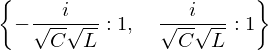

In [132]:
zs = cir.Y.zeros()
zs

In [175]:
# w=Symbol('w',real=True)
# Yw = cir.Y.subs({Symbol('s'):Mul(sp.I,w)})
# dY = sp.diff(Yw,Symbol('w'))
# print dY

dY = sp.diff(cir.Y,Symbol('s'))

In [134]:
from sympy.utilities import lambdify
from sympy import I
from sympy.core.mul import Mul,Pow,Add
import numpy as np
from scipy.constants import e,h,pi

In [135]:
N_ws = lambdify( ['L','C'], ws, "numpy" )
N_ws(np.ones(3)*(2.+0j),(2.+0j)) # NEEDS TO BE COMPLEX!!

[array([-0.-0.5j, -0.-0.5j, -0.-0.5j]), array([0.+0.5j, 0.+0.5j, 0.+0.5j])]

In [176]:
dY

As = []
for w in wps:
    print w
    As.append(Mul(1/Symbol('L'),Mul(Pow(1/re(dY.subs({Symbol('s'):Mul(sp.I,w)})),2),Pow(1/w,2))))
#     print dY.subs({Symbol('s'):Mul(sp.I,w)})

1/(sqrt(C)*sqrt(L))


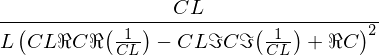

In [177]:
sp.simplify(As[0])

In [138]:
np.concatenate([np.ones(3),[1]])

array([1., 1., 1., 1.])

In [139]:
u,v  = Symbol('u'),Symbol('v')
sp.refine(im(u),)

In [178]:
N_As = lambdify( ['L','C'], As[0], "numpy" )
N_As(np.ones(3)*(2.+0j),(2.+0j)) # NEEDS TO BE COMPLEX!!

array([0.125+0.j, 0.125+0.j, 0.125+0.j])

In [187]:
x = [0,1]
**x

SyntaxError: invalid syntax (<ipython-input-187-7b4cbaf7e173>, line 2)